# HW 8-1 使用Functional API打造神經網路
---
(慣例的基本套件載入)

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


載入 MNIST 資料檔並進行前處理

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_train = len(x_train); n_test = len(x_test)
x_dim= x_test.shape[1:]; x_dim_re = np.prod(x_dim)

x_train = x_train.reshape(n_train, x_dim_re)
x_test = x_test.reshape(n_test, x_dim_re)

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_train -= x_train.min()
x_train = x_train/x_train.max()

x_test -= x_test.min()
x_test = x_test/x_test.max()

Using TensorFlow backend.


## Functional API

先做跟上次一樣的 Model 牛刀小試一下

In [3]:
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adadelta

f_1 = Dense(81, activation='relu')
f_2 = Dense(16, activation='relu')
f_opt = Dense(10, activation='softmax')

ipt = Input(shape=(784,))
h_1 = f_1(ipt)
h_2 = f_2(h_1)
opt = f_opt(h_2)

model = Model(ipt, opt)
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=1), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 81)                63585     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1312      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 65,067
Trainable params: 65,067
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.3648 - acc: 0.8940
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1628 - acc: 0.9518
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1233 - acc: 0.9636
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1012 - acc: 0.9701
Epoch 5/20
60000/60000 [==============================] - ETA: 0s - loss: 0.0853 - acc: 0.9743- ETA: 0s - loss:  - 2s 36us/step - loss: 0.0852 - acc: 0.9743
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0724 - acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0638 - acc: 0.9811
Epoch 8/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0555 - acc: 0.9834
Epoch 9/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0497 - acc: 0.9852
Epoch 10/20
60000/60000 [==================

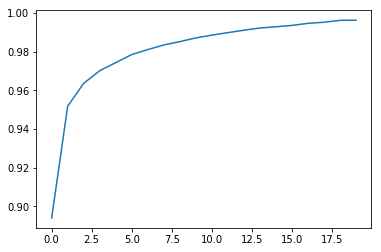

In [4]:
model_fitted = model.fit(x_train, y_train, batch_size=100, epochs=20)
plt.plot(model_fitted.history["acc"])

俗擱有力!

## 非線性堆疊

接下來我們嘗試非線性模型，看能否於 epochs=10 就超越 99%

In [5]:
from keras.layers import concatenate, add

f_2_alt = Dense(16, activation='sigmoid')
f_opt_alt = Dense(10, activation='softmax')

h_2_alt = f_2_alt(h_1)
h_2_com = concatenate([h_2, h_2_alt])
opt_alt = f_opt_alt(h_2_com)

model_alt = Model(ipt, opt_alt)
model_alt.compile(loss='categorical_crossentropy', optimizer=Adadelta(lr=1), metrics=['accuracy'])
model_alt.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 81)           63585       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 16)           1312        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 16)           1312        dense_1[0][0]                    
__________________________________________________________________________________________________
concatenat

In [6]:
model_alt_fitted = model_alt.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3589 - acc: 0.9032
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0925 - acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0648 - acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0508 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0417 - acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0346 - acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0300 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0255 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0227 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0198 - acc: 0.9948

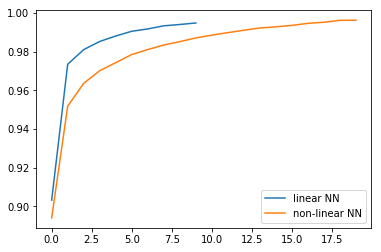

In [7]:
plt.plot(model_alt_fitted.history["acc"])
plt.plot(model_fitted.history["acc"])
plt.legend(['linear NN','non-linear NN'])

可以!!